In [6]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [7]:
dev = qml.device('default.qubit', wires = 2)
@qml.qnode(dev)
def circuit_1(theta):
    qml.RX(theta, wires = 0)
    qml.RY(2*theta, wires = 1)

    results = []
    results.append(qml.expval(qml.PauliZ(0)))
    results.append(qml.expval(qml.PauliZ(1)))

    return results
@qml.qnode(dev)
def circuit_2(theta):
    qml.RX(theta, wires = 0)
    qml.RY(2*theta, wires = 1)

    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))


def zi_iz_combination(ZI_results, IZ_results):
    combined_results = np.zeros(len(ZI_results))

    for i in range(len(ZI_results)):
        combined_results[i] = ZI_results[i]*IZ_results[i]

    return combined_results

In [8]:
theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])


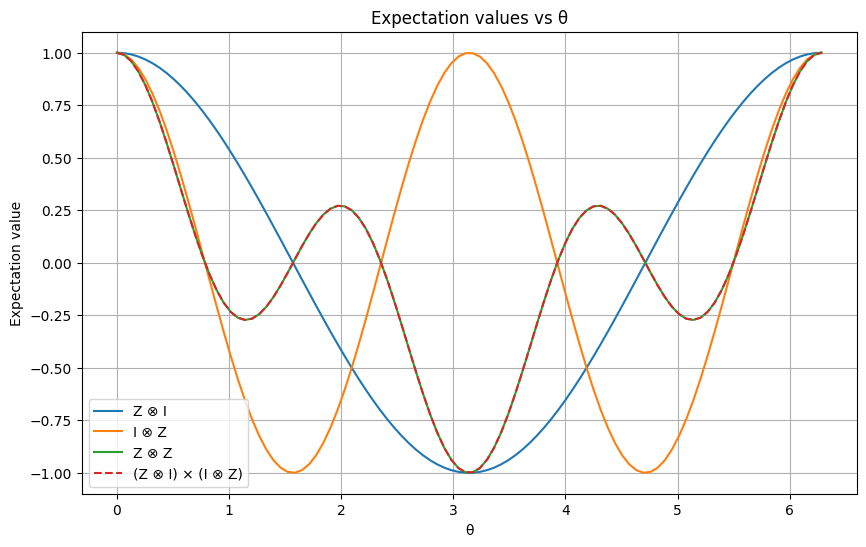

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(theta, ZI_results, label='Z ⊗ I')
plt.plot(theta, IZ_results, label='I ⊗ Z')
plt.plot(theta, ZZ_results, label='Z ⊗ Z')
plt.plot(theta, combined_results, '--', label='(Z ⊗ I) × (I ⊗ Z)')
plt.xlabel('θ')
plt.ylabel('Expectation value')
plt.legend()
plt.title('Expectation values vs θ')
plt.grid(True)
plt.show()